# Binary Classification with Logistic Regression

In [1]:
# import modules for preprocessing 
import os
import skimage
from skimage import data
from skimage import io
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import natsort
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay





## Preprocess the data

### Function image_to_vec() will:
####  - Read in the image file names in the directory and sort them in ascending order.
####  - Add the directory path to each image name, so all images can be found.
#### - Find the images using the paths.
#### - Read in the images as grayscale
#### - Convert the images into arrays
#### - Return a list of image arrays and a list of each file name.

In [2]:
imagefile_list = os.listdir('dataset/sample_images/') # dataset of 200
directory = 'dataset/sample_images/'

#print(os.getcwd()) # check current directory
#imagefile_list = os.listdir('test/image/') # test dataset of 200
#directory = 'test/image/'




# Function to take image files in dir, convert them into vectors and save them to a list

def image_to_vec(file_list, directory):    
    vec_list = []
    files = []
    for filename in file_list:
        if filename.endswith('.jpg'):
            files.append(filename)
    files = natsort.natsorted(files) # sort file names in ascending order
    #print(files)
    for file in files:
      image_path = directory+file
      #print(image_path)
      image = np.array(imread(image_path, as_gray=True)) #read in as grayscale
      vec_list.append(image)

    return vec_list,files 
   




##### 1. Read in the binary labels.

In [3]:
# Loading the csv file
tumors = pd.read_csv('./dataset/sample_labels_0_1.csv', sep=',')
#print(tumors)

#### 2. Split the file names and label data into their own lists. Run the file names and labels through the function that will find the images in the directory, and convert them into an array.

In [4]:

# Split the data
im_files = list(tumors['file_name']) # converting to list in order to access each filename
labels = tumors['label']
#print(labels)

im_vecs,filenames = image_to_vec(im_files,directory) 

# plt.imshow(im_vecs[0], cmap='gray') #check that im_vecs has image vectors in correct order


#### 3. Merge the image and label data.

In [5]:
data = list(zip(im_vecs,labels)) # join the image vectors and their respective labels
data # output should show that each array is paired with its label
print(data[0])
#print('data type',type(data))
#for i in range(len(data)):
    #print('index:',i,'label:',labels[i])


(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 1)


#### 4. Convert the image and label data into arrays X and Y.

In [6]:
# Loading the data file: 

def list_to_array(list_of_tuples): # Convert the data from list type to array
    X=[]
    Y=[]
    count=0
    for pair in list_of_tuples:
        temp=pair[0]
        temp2=pair[1]
        X.append(temp)
        Y.append(temp2)
        count+=1
        #print(count,'tuples converted to array') #comment out to see check function is running
    X=np.asarray(X)
    Y=np.asarray(Y)
    
    return X,Y

X,Y=list_to_array(data)
X=X.reshape(200,262144) # MAKE SURE THIS MATCHES COUNT OF DATA SAMPLES


# Shuffle
X, Y = shuffle(X,Y)
#print('x shape',X.shape, 'y shape',Y.shape)

#Split the data into training and test (validation) set, if there's no real test data 
##x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

#print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
#print('x_test shape',x_test.shape,'y_test shape',y_test.shape)

### Preprocess the test data

In [7]:
imagefile_list_test = os.listdir('test/image/') # test dataset of 200
directory_test = 'test/image/'
tumors_test = pd.read_csv('test/labels_0_1.csv', sep=',') # binary class labels
#print(tumors_test)


# Split the data
im_files_test = list(tumors_test['file_name']) # converting to list in order to access each filename
labels_test = tumors_test['label2']
#print(labels_test)



# Convert image tpo arpray
im_vecs_test,filenames_test = image_to_vec(im_files_test,directory_test) 



#plt.imshow(im_vecs_test[0], cmap='gray') #check that im_vecs has image vectors in correct order

# Join image vectors with labels
data_test = list(zip(im_vecs_test,labels_test))


# Convert list of arrays into array of arrays
X_test,Y_test=list_to_array(data_test)
X_test=X_test.reshape(200,262144) # MAKE SURE THIS MATCHES COUNT OF DATA SAMPLES

print('X_test.shape',X_test.shape,'Y_test.shape',Y_test.shape)
print('X.shape',X.shape,'Y.shape',Y.shape)


# extracting training and validation data from training dataset 
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.7, random_state=0)

X_test,Y_test = shuffle(X_test,Y_test)
# extracting test data from test dataset and discarding training portion by asssigning
# it to dummy variables that won't be used.
x_dummy, x_test, y_dummy, y_test = train_test_split(X_test, Y_test, test_size=0.3, random_state=0)





X_test.shape (200, 262144) Y_test.shape (200,)
X.shape (200, 262144) Y.shape (200,)


### Define the logistic regression model

In [8]:



def sigmoid(z):
    return 1. / (1. + np.exp(-z))  # z=feature vector xTrain times parameter vector theta  


def param_update(xTrain, yTrain):
    #print('xTrain shape before',xTrain.shape) 
    new_col = np.zeros((xTrain.shape[0], 1)) 
    xTrain = np.append(xTrain, new_col, axis=1)
    #print('xTrain shape after',xTrain.shape)
    
    #initialise parameters
    theta = np.zeros(xTrain.shape[1]) 
    epoch=1440
    alpha = 0.01 
   
    for i in range(epoch): # instead of epoch,loop until close to zero
        z = np.dot(xTrain, theta) # feature vector times parameter vector
        h = sigmoid(z)  
        gradient = theta - alpha * np.dot(xTrain.T,(h-yTrain))/yTrain.shape[0]
        theta = gradient 
        #print out shows at which iteration the function starts to converge,
        # meaning that the values change more slowly
        print('sum(gradient)',i,sum(gradient))
  
    return theta

def train_predict(xTrain, yTrain, xVal,yVal):
    xTrain = xTrain - xTrain.mean() # normalise
    #print('xVal shape before',xVal.shape) 
    theta = param_update(xTrain, yTrain)
    new_col = np.ones((xVal.shape[0], 1)) 
    xVal = np.append(xVal, new_col, axis=1)
    #print('xVal shape after',xVal.shape)
    z = np.dot(xVal,theta)
    h = sigmoid(z)
    y_pred = h >= 0.5 # true or false assignment 
    score = accuracy_score(yVal,y_pred)
    
    return y_pred, score, theta


### Train and test the model on training and validation data

In [9]:
  
y_pred,score, theta = train_predict(x_train,y_train,x_val,y_val) 
#print('Accuracy score',score)
#print('y_pred', y_pred)


#print(classification_report(y_val,y_pred)) # main classification metrics




sum(gradient) 0 -11.368231732693284
sum(gradient) 1 -21.07709733334238
sum(gradient) 2 -22.416102447011472
sum(gradient) 3 -1.28191305681831
sum(gradient) 4 -14.32175190115663
sum(gradient) 5 0.32494816748699396
sum(gradient) 6 -12.672270827989587
sum(gradient) 7 -6.472944028876918
sum(gradient) 8 -17.49448331300574
sum(gradient) 9 -8.906867333008643
sum(gradient) 10 -11.923926283812149
sum(gradient) 11 -12.039367881249376
sum(gradient) 12 -12.408338782180028
sum(gradient) 13 -12.79023474490435
sum(gradient) 14 -13.085044106816193
sum(gradient) 15 -13.440151626295576
sum(gradient) 16 -13.703850647806108
sum(gradient) 17 -14.02542327712893
sum(gradient) 18 -14.272104622464452
sum(gradient) 19 -14.55794831083109
sum(gradient) 20 -14.794628444279383
sum(gradient) 21 -15.048616133800742
sum(gradient) 22 -15.275484490186438
sum(gradient) 23 -15.50471964275166
sum(gradient) 24 -15.719708063371023
sum(gradient) 25 -15.930457128288813
sum(gradient) 26 -16.132575484812925
sum(gradient) 27 -16.3

sum(gradient) 224 -27.940180158400274
sum(gradient) 225 -27.964846547818784
sum(gradient) 226 -27.98940276407141
sum(gradient) 227 -28.013849782289324
sum(gradient) 228 -28.038188564767665
sum(gradient) 229 -28.062420061183392
sum(gradient) 230 -28.08654520882245
sum(gradient) 231 -28.110564932783678
sum(gradient) 232 -28.134480146197326
sum(gradient) 233 -28.15829175042297
sum(gradient) 234 -28.182000635258
sum(gradient) 235 -28.205607679122846
sum(gradient) 236 -28.229113749268862
sum(gradient) 237 -28.252519701948316
sum(gradient) 238 -28.275826382616973
sum(gradient) 239 -28.29903462610095
sum(gradient) 240 -28.32214525677838
sum(gradient) 241 -28.345159088754823
sum(gradient) 242 -28.36807692602907
sum(gradient) 243 -28.390899562659918
sum(gradient) 244 -28.413627782933062
sum(gradient) 245 -28.436262361512732
sum(gradient) 246 -28.45880406360551
sum(gradient) 247 -28.4812536451073
sum(gradient) 248 -28.503611852757505
sum(gradient) 249 -28.52587942428495
sum(gradient) 250 -28.548

sum(gradient) 443 -31.707106114307884
sum(gradient) 444 -31.719531956278885
sum(gradient) 445 -31.731929667415464
sum(gradient) 446 -31.744299374635435
sum(gradient) 447 -31.756641204003564
sum(gradient) 448 -31.768955280732197
sum(gradient) 449 -31.78124172919877
sum(gradient) 450 -31.79350067294201
sum(gradient) 451 -31.805732234678565
sum(gradient) 452 -31.817936536308313
sum(gradient) 453 -31.830113698916815
sum(gradient) 454 -31.84226384278907
sum(gradient) 455 -31.854387087410505
sum(gradient) 456 -31.866483551477938
sum(gradient) 457 -31.878553352907815
sum(gradient) 458 -31.890596608835917
sum(gradient) 459 -31.90261343563405
sum(gradient) 460 -31.914603948908063
sum(gradient) 461 -31.926568263510422
sum(gradient) 462 -31.938506493544352
sum(gradient) 463 -31.95041875236615
sum(gradient) 464 -31.96230515260158
sum(gradient) 465 -31.9741658061446
sum(gradient) 466 -31.986000824164027
sum(gradient) 467 -31.997810317111938
sum(gradient) 468 -32.00959439473184
sum(gradient) 469 -32

sum(gradient) 664 -33.934827892343094
sum(gradient) 665 -33.94310273226911
sum(gradient) 666 -33.95136508070423
sum(gradient) 667 -33.95961497530264
sum(gradient) 668 -33.9678524535459
sum(gradient) 669 -33.976077552745295
sum(gradient) 670 -33.9842903100531
sum(gradient) 671 -33.99249076243992
sum(gradient) 672 -34.00067894672771
sum(gradient) 673 -34.008854899560504
sum(gradient) 674 -34.017018657423165
sum(gradient) 675 -34.02517025663985
sum(gradient) 676 -34.03330973336784
sum(gradient) 677 -34.0414371236058
sum(gradient) 678 -34.04955246319544
sum(gradient) 679 -34.05765578781421
sum(gradient) 680 -34.065747132985976
sum(gradient) 681 -34.07382653407574
sum(gradient) 682 -34.08189402628804
sum(gradient) 683 -34.08994964467949
sum(gradient) 684 -34.097993424148676
sum(gradient) 685 -34.10602539943893
sum(gradient) 686 -34.11404560514406
sum(gradient) 687 -34.12205407570656
sum(gradient) 688 -34.130050845413685
sum(gradient) 689 -34.13803594840546
sum(gradient) 690 -34.146009418674

sum(gradient) 885 -35.51366510474545
sum(gradient) 886 -35.5198676175299
sum(gradient) 887 -35.52606311014103
sum(gradient) 888 -35.53225159845564
sum(gradient) 889 -35.538433098303635
sum(gradient) 890 -35.544607625455676
sum(gradient) 891 -35.55077519563248
sum(gradient) 892 -35.5569358245013
sum(gradient) 893 -35.56308952767396
sum(gradient) 894 -35.5692363207165
sum(gradient) 895 -35.57537621913443
sum(gradient) 896 -35.581509238384534
sum(gradient) 897 -35.58763539387366
sum(gradient) 898 -35.59375470095223
sum(gradient) 899 -35.59986717492427
sum(gradient) 900 -35.60597283104193
sum(gradient) 901 -35.612071684503356
sum(gradient) 902 -35.61816375045657
sum(gradient) 903 -35.62424904399819
sum(gradient) 904 -35.63032758018239
sum(gradient) 905 -35.63639937400201
sum(gradient) 906 -35.64246444040695
sum(gradient) 907 -35.648522794295275
sum(gradient) 908 -35.65457445051841
sum(gradient) 909 -35.660619423872014
sum(gradient) 910 -35.66665772910979
sum(gradient) 911 -35.6726893809348

sum(gradient) 1103 -36.72267743742113
sum(gradient) 1104 -36.72765144316806
sum(gradient) 1105 -36.732620934501945
sum(gradient) 1106 -36.73758591961253
sum(gradient) 1107 -36.74254640667231
sum(gradient) 1108 -36.74750240383027
sum(gradient) 1109 -36.752453919215604
sum(gradient) 1110 -36.7574009609305
sum(gradient) 1111 -36.76234353705937
sum(gradient) 1112 -36.767281655663105
sum(gradient) 1113 -36.77221532478137
sum(gradient) 1114 -36.777144552428545
sum(gradient) 1115 -36.78206934660559
sum(gradient) 1116 -36.786989715285145
sum(gradient) 1117 -36.79190566641835
sum(gradient) 1118 -36.796817207939235
sum(gradient) 1119 -36.80172434775647
sum(gradient) 1120 -36.80662709375649
sum(gradient) 1121 -36.81152545381138
sum(gradient) 1122 -36.816419435766235
sum(gradient) 1123 -36.82130904744472
sum(gradient) 1124 -36.826194296655906
sum(gradient) 1125 -36.831075191179494
sum(gradient) 1126 -36.83595173877773
sum(gradient) 1127 -36.84082394719411
sum(gradient) 1128 -36.845691824152404
sum

sum(gradient) 1318 -37.69994329045011
sum(gradient) 1319 -37.70410466088119
sum(gradient) 1320 -37.70826287203966
sum(gradient) 1321 -37.71241792872675
sum(gradient) 1322 -37.71656983572899
sum(gradient) 1323 -37.72071859782011
sum(gradient) 1324 -37.72486421977168
sum(gradient) 1325 -37.72900670633306
sum(gradient) 1326 -37.733146062248004
sum(gradient) 1327 -37.73728229225248
sum(gradient) 1328 -37.74141540106707
sum(gradient) 1329 -37.745545393404505
sum(gradient) 1330 -37.74967227396334
sum(gradient) 1331 -37.75379604743782
sum(gradient) 1332 -37.757916718503836
sum(gradient) 1333 -37.762034291833885
sum(gradient) 1334 -37.76614877208675
sum(gradient) 1335 -37.77026016390587
sum(gradient) 1336 -37.77436847193358
sum(gradient) 1337 -37.77847370079532
sum(gradient) 1338 -37.782575855109656
sum(gradient) 1339 -37.786674939481244
sum(gradient) 1340 -37.79077095850452
sum(gradient) 1341 -37.79486391677036
sum(gradient) 1342 -37.79895381885111
sum(gradient) 1343 -37.803040669311976
sum(g

### Define a prediction-only function

In [10]:
def predict(xTest,yTest,theta): # using value of theta learned from training model
    xTest = xTest - xTest.mean() # normalise
    new_col = np.zeros((xTest.shape[0], 1)) 
    xTest = np.append(xTest, new_col, axis=1)
    z = np.dot(xTest,theta)
    h = sigmoid(z)
    y_pred = h >= 0.5 # true or false assignment 
    score = accuracy_score(yTest,y_pred)
    
    cm = confusion_matrix(yTest,y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()
    plt.show()    
    return y_pred, score



### Prediction on unseen test data

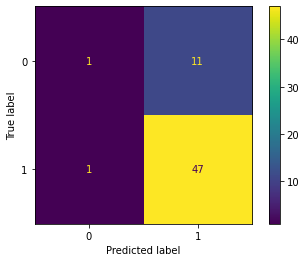

Accuracy score2 0.8
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.81      0.98      0.89        48

    accuracy                           0.80        60
   macro avg       0.66      0.53      0.51        60
weighted avg       0.75      0.80      0.74        60



In [11]:
y_pred2,score2 = predict(x_test,y_test,theta)
print('Accuracy score2',score2)
print(classification_report(y_test,y_pred2))